# Assignment 6.4 Redo

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

#### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# create path

path = r'/Users/allisonweese/Documents/Career Foundry/Achievement 6'

In [7]:
# import dataframe 

df = pd.read_csv(os.path.join(path, 'Data After Assignment 6.2', 'winners2.csv'), index_col = False)

#### 2. Data Cleaning

In [8]:
df.head()

,Unnamed: 0,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
0,0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70,2:13:23.600,FAR
1,1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100,3:13:18.700,FAN
2,2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138,2:46:55.970,PAR
3,3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42,2:02:53.700,FAR
4,4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35,2:47:26.000,FAN


In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
# Define a function to convert time to total seconds

def time_to_seconds(time_str):
    if ':' in time_str:
        parts = time_str.split(':')
        if len(parts) == 3:
            h, m, s = map(float, parts)
        else:
            h = 0
            m, s = map(float, parts)
        return int(h * 3600 + m * 60 + s)
    else:
        m, s = map(float, time_str.split('.'))
        return int(m * 60 + s)

# Apply the function to the relevant column

df['Total_Seconds'] = df['Time'].apply(time_to_seconds)

# Display the updated DataFrame

print(df.head())  # Show the first few rows of the updated DataFrame

         Grand Prix        Date                Winner  \
0     Great Britain  1950-05-13         Nino  Farina    
1            Monaco  1950-05-21  Juan Manuel  Fangio    
2  Indianapolis 500  1950-05-30      Johnnie Parsons    
3       Switzerland  1950-06-04         Nino  Farina    
4           Belgium  1950-06-18  Juan Manuel  Fangio    

                        Car  Laps         Time Name Code  Total_Seconds  
0                Alfa Romeo    70  2:13:23.600       FAR           8003  
1                Alfa Romeo   100  3:13:18.700       FAN          11598  
2  Kurtis Kraft Offenhauser   138  2:46:55.970       PAR          10015  
3                Alfa Romeo    42  2:02:53.700       FAR           7373  
4                Alfa Romeo    35  2:47:26.000       FAN          10046  


In [15]:
# check shape

df.shape

(1107, 8)

In [14]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Grand Prix       0
Date             0
Winner           0
Car              0
Laps             0
Time             0
Name Code        0
Total_Seconds    0
dtype: int64

In [16]:
dups = df.duplicated()

In [17]:
dups.shape # No dups

(1107,)

/var/folders/vd/05k6yy6d1bl3qgn_9qglj0d00000gn/T/ipykernel_18835/3120154694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Seconds'], bins=25) # Shows extreme values


<Axes: xlabel='Total_Seconds', ylabel='Density'>

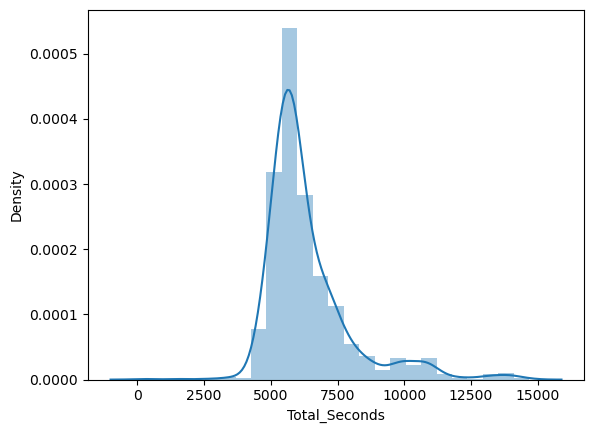

In [18]:
sns.distplot(df['Total_Seconds'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [20]:
df['Total_Seconds'].mean() # Check the mean

6369.696476964769

In [21]:
df['Total_Seconds'].median() # Check the median

5893.0

In [22]:
df['Total_Seconds'].max() # Check the max

14679

#### 3. Data Prep for Regression Analysis

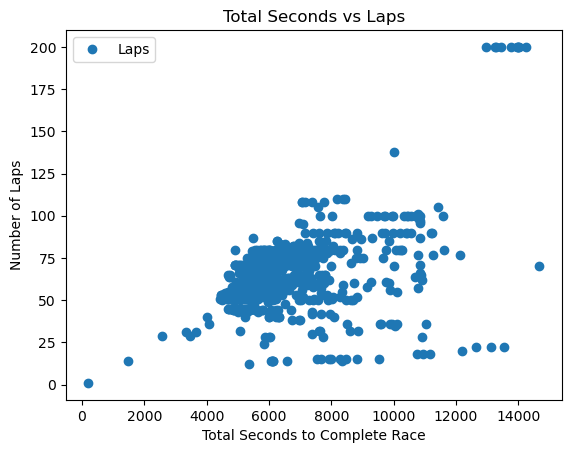

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Total_Seconds', y='Laps',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Seconds vs Laps')  
plt.xlabel('Total Seconds to Complete Race')  
plt.ylabel('Number of Laps')  
plt.show()

# Hypothesis
    There is a positive linear relationship between the total race time in seconds and the number of laps per race

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Total_Seconds'].values.reshape(-1,1)
y = df['Laps'].values.reshape(-1,1)

In [25]:
X

array([[ 8003],
       [11598],
       [10015],
       ...,
       [ 6863],
       [ 6052],
       [ 5449]])

In [27]:
y

array([[ 70],
       [100],
       [138],
       ...,
       [ 53],
       [ 56],
       [ 57]])

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression Analysis

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

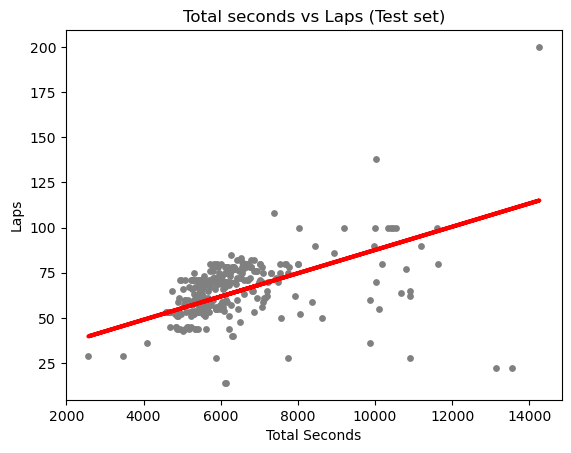

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total seconds vs Laps (Test set)')
plot_test.xlabel('Total Seconds')
plot_test.ylabel('Laps')
plot_test.show()

# interpret

    The scatter plot shows a moderate correlation between total seconds and the number of laps, with the red regression line indicating a general trend of increasing laps with more total seconds. However, the wide spread of data points around the line and the presence of outliers suggest that the linear model does not perfectly capture the relationship, indicating that other factors may also be influencing the number of laps.

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0064372]]
Mean squared error:  230.99848233152292
R2 score:  0.1323222377342731


In [35]:
y_predicted

array([[ 67.94773507],
       [ 58.08594688],
       [ 66.68604415],
       [ 68.6880129 ],
       [ 66.95640649],
       [ 62.53405108],
       [ 57.51303621],
       [ 58.84553631],
       [ 55.08621235],
       [ 61.1114302 ],
       [ 55.88442498],
       [ 57.26198547],
       [ 65.97151511],
       [ 57.93145412],
       [ 73.11680551],
       [ 57.05599511],
       [ 80.82213218],
       [ 68.40477617],
       [ 59.95273446],
       [ 65.49516242],
       [ 87.68418584],
       [ 62.96534339],
       [ 61.43329013],
       [ 59.43775858],
       [ 63.67343523],
       [ 56.88862795],
       [ 61.05993261],
       [ 86.67998287],
       [ 62.0319496 ],
       [ 58.29837443],
       [ 59.48281897],
       [ 57.46797582],
       [ 58.71035514],
       [ 62.30231194],
       [ 62.78510183],
       [ 61.09855581],
       [ 60.57714272],
       [ 59.354075  ],
       [ 62.80441342],
       [ 58.39493241],
       [ 62.03838679],
       [ 71.3916363 ],
       [ 59.61800014],
       [ 63

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,61,67.947735
1,71,58.085947
2,72,66.686044
3,56,68.688013
4,82,66.956406
5,75,62.534051
6,58,57.513036
7,56,58.845536
8,44,55.086212
9,55,61.111430


In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0064372]]
Mean squared error:  357.1074871049339
R2 score:  0.2439184800525015


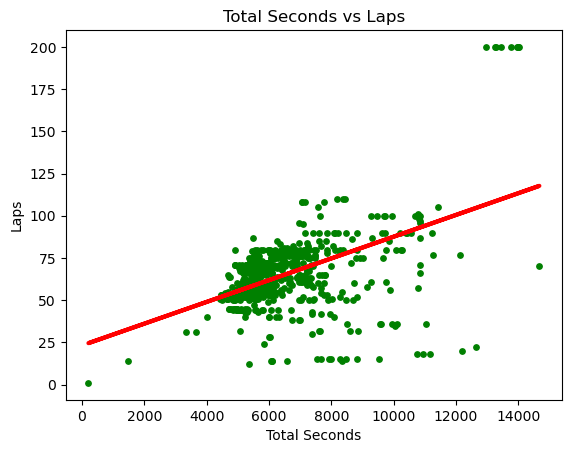

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Seconds vs Laps')
plot_test.xlabel('Total Seconds')
plot_test.ylabel('Laps')
plot_test.show()

# thoughts on model and bias

    The model’s performance on the test set appears to be moderate, as indicated by the scatter plot. While the regression line shows a general upward trend between total seconds and the number of laps, the significant scatter of data points around the line suggests that the model may not be capturing all the underlying patterns in the data. This could indicate that the linear model is too simplistic for this particular dataset or that other variables not included in the model could better explain the variability in laps.

    Regarding data bias, it's possible that certain laps or race conditions are underrepresented or overrepresented in the dataset, which could skew the model's predictions. For example, if the data primarily includes races with specific track conditions, weather, or car performance levels, the model may not generalize well to different scenarios. Bias in the data could also result from historical trends or selection biases, such as focusing on certain drivers or teams. These biases could lead to a model that performs well on the test set but poorly in real-world scenarios where the conditions differ. Therefore, it's essential to evaluate the dataset carefully and consider whether the data used in training and testing accurately reflects the broader context in which the model will be applied.

In [42]:
df.to_csv(os.path.join(path, 'winners3.csv'))